In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import autoregression
import matplotlib.pyplot as plt
%matplotlib inline

In [177]:
df = pd.read_csv('/Users/ElliottC/g/projects/yelp/predicting_restaurant_closure/data/featurized_dataframe.csv')
y_true = df[['closed_on_google']]
x_columns = df[['count','review_count','stars',
    'Attribute|has_Alcohol', 'Attribute|has_Ambience|casual', 'Attribute|has_Ambience|classy', 
                'Attribute|has_Ambience|divey', 'Attribute|has_Ambience|hipster', 
                'Attribute|has_Ambience|intimate', 'Attribute|has_Ambience|romantic', 
                'Attribute|has_Ambience|touristy', 'Attribute|has_Ambience|trendy', 
                'Attribute|has_Ambience|upscale', 'Attribute|has_BikeParking', 
                'Attribute|has_BusinessAcceptsCreditCards', 'Attribute|has_BusinessParking|garage', 
                'Attribute|has_BusinessParking|lot', 'Attribute|has_BusinessParking|street', 
                'Attribute|has_BusinessParking|valet', 'Attribute|has_BusinessParking|validated', 
                'Attribute|has_Caters', 'Attribute|has_CoatCheck', 'Attribute|has_DogsAllowed', 
                'Attribute|has_DriveThru', 'Attribute|has_GoodForDancing', 'Attribute|has_GoodForKids', 
                'Attribute|has_GoodForMeal|breakfast', 'Attribute|has_GoodForMeal|brunch', 
                'Attribute|has_GoodForMeal|dessert', 'Attribute|has_GoodForMeal|dinner', 
                'Attribute|has_GoodForMeal|latenight', 'Attribute|has_GoodForMeal|lunch', 
                'Attribute|has_HappyHour', 'Attribute|has_HasTV', 'Attribute|has_Music|background_music', 
                'Attribute|has_Music|dj', 'Attribute|has_Music|jukebox', 'Attribute|has_Music|karaoke', 
                'Attribute|has_Music|live', 'Attribute|has_Music|no_music', 'Attribute|has_Music|video', 
                'Attribute|has_NoiseLevel', 'Attribute|has_OutdoorSeating', 'Attribute|has_RestaurantsAttire', 
                'Attribute|has_RestaurantsDelivery', 'Attribute|has_RestaurantsGoodForGroups', 
                'Attribute|has_RestaurantsPriceRange2', 'Attribute|has_RestaurantsReservations', 
                'Attribute|has_RestaurantsTableService', 'Attribute|has_RestaurantsTakeOut', 
                'Attribute|has_Smoking', 'Attribute|has_WheelchairAccessible', 'Attribute|has_WiFi', 
                'Category|American (New)_true', 'Category|American (Traditional)_true', 
                'Category|Arts & Entertainment_true', 'Category|Asian Fusion_true', 
                'Category|Automotive_true', 'Category|Bakeries_true', 'Category|Barbeque_true', 
                'Category|Bars_true', 'Category|Beer_true', 'Category|Breakfast & Brunch_true', 
                'Category|Burgers_true', 'Category|Cafes_true', 'Category|Caterers_true', 
                'Category|Chicken Wings_true', 'Category|Chinese_true', 'Category|Cocktail Bars_true',
                'Category|Coffee & Tea_true', 'Category|Convenience Stores_true', 'Category|Delis_true', 
                'Category|Desserts_true', 'Category|Diners_true', 'Category|Drugstores_true', 
                'Category|Event Planning & Services_true', 'Category|Fast Food_true', 
                'Category|Food Trucks_true', 'Category|Food_true', 'Category|Gas Stations_true', 
                'Category|Grocery_true', 'Category|Ice Cream & Frozen Yogurt_true', 
                'Category|Italian_true', 'Category|Japanese_true', 'Category|Juice Bars & Smoothies_true', 
                'Category|Lounges_true', 'Category|Mediterranean_true', 'Category|Mexican_true', 
                'Category|Nightlife_true', 'Category|Pizza_true', 'Category|Pubs_true', 
                'Category|Restaurants_true', 'Category|Salad_true', 'Category|Sandwiches_true', 
                'Category|Seafood_true', 'Category|Shopping_true', 'Category|Specialty Food_true', 
                'Category|Sports Bars_true', 'Category|Steakhouses_true', 'Category|Sushi Bars_true', 
                'Category|Tex-Mex_true', 'Category|Wine & Spirits_true', 'Category|Wine Bars_true']]
model = RandomForestClassifier()
model.fit(x_columns, y_columns)
y_pred = model.predict(x_columns)

X_train, X_test, y_train, y_test = train_test_split(x_columns, y_true, test_size=0.33, random_state=42)

/Users/ElliottC/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [179]:
confusion_matrix(y_columns, model.predict(x_columns))

array([[28773,     4],
       [  162,   515]])

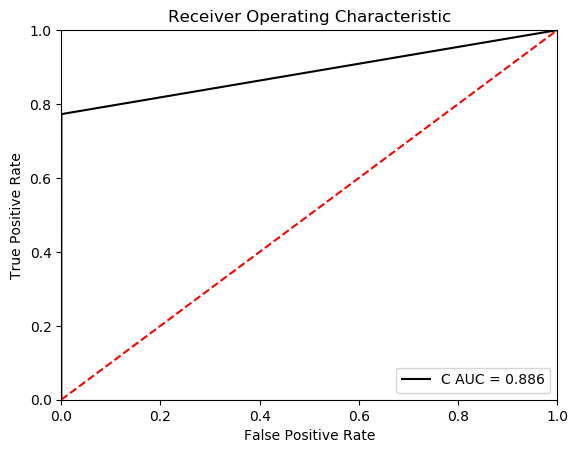

In [180]:
y_true = y_test
y_pred = model.predict(X_test)

fpr, tpr, threshold = roc_curve(y_true, y_pred)
area_under_curve = auc(fpr, tpr)

# method I: plt
fig, ax = plt.subplots()
plt.title('Receiver Operating Characteristic')
ax.plot(fpr, tpr, 'k', label = 'C AUC = %0.3f' % area_under_curve)

ax.legend(loc = 'lower right')
ax.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

In [181]:
area_under_curve

0.8862581288726045

In [189]:
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

      False       0.99      1.00      1.00      9478
       True       0.99      0.77      0.87       242

avg / total       0.99      0.99      0.99      9720



(array([8.726e+03, 3.000e+01, 7.000e+01, 3.400e+01, 1.600e+01, 3.730e+02,
        1.700e+01, 2.800e+01, 1.600e+01, 1.200e+01, 8.500e+01, 1.500e+01,
        1.200e+01, 1.200e+01, 1.300e+01, 1.900e+01, 8.000e+00, 2.000e+00,
        1.000e+01, 8.000e+00, 1.900e+01, 4.000e+00, 1.000e+01, 8.000e+00,
        5.000e+00, 3.000e+01, 5.000e+00, 4.000e+00, 1.000e+00, 1.000e+00,
        4.100e+01, 2.000e+00, 0.000e+00, 1.000e+00, 3.800e+01, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 3.000e+01, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects

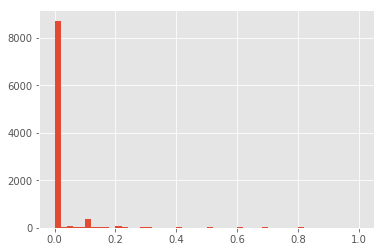

In [103]:
plt.hist(model.predict_proba(X_test)[:,1], bins=50)

(0, 0.27298748832142483)

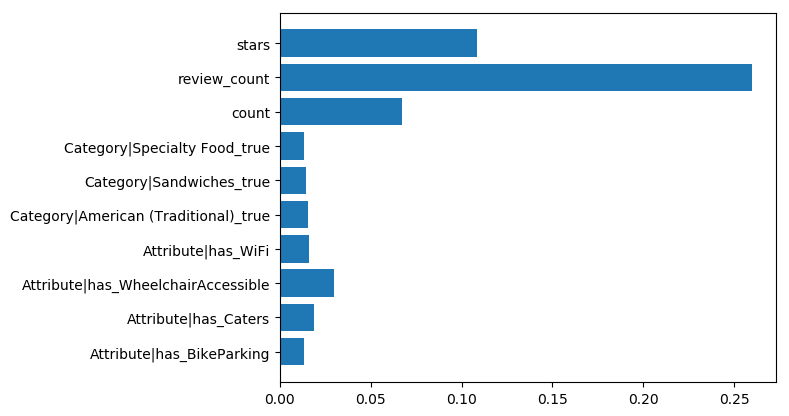

In [200]:
fig, ax = plt.subplots()
ax.barh(features, values)
ax.set_xlim(xmin=0)

In [199]:
features = [feature[0] for feature in top_features]
values = [feature[1] for feature in top_features]

In [149]:
np.array(top_features)[:,0]

array(['review_count', 'stars', 'Sandwiches_true',
       'Breakfast & Brunch_true', 'American (Traditional)_true',
       'American (New)_true', 'Restaurants_true', 'Coffee & Tea_true',
       'Salad_true', 'Food_true'], dtype='<U27')

In [112]:
x_columns.columns[0]

'review_count'

In [183]:
feature_values = {}
for i in range(len(model.feature_importances_)):
    feature_values[x_columns.columns[i]] = model.feature_importances_[i]

In [184]:
top_features = sorted(feature_values.items(), key=lambda x: x[1], reverse=True)[:10]

TypeError: only size-1 arrays can be converted to Python scalars

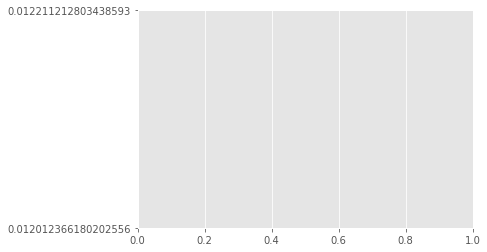

In [142]:
fig, ax = plt.subplots()

In [159]:
chart_features = np.array(top_features)[:,0] 
chart_values = np.array(top_features)[:,1]

<Container object of 10 artists>

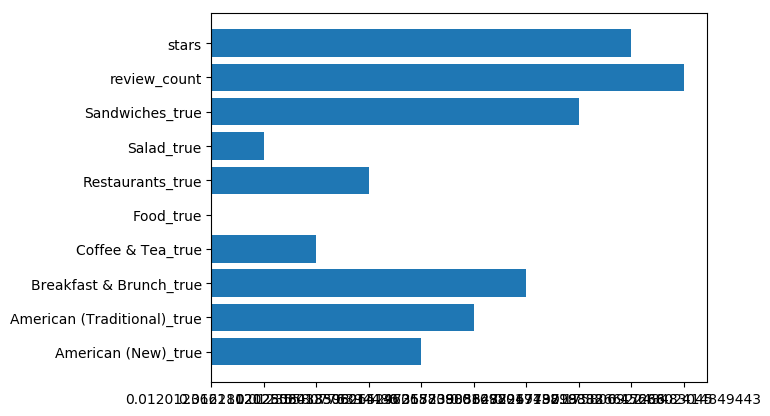

In [166]:
fig, ax = plt.subplots()
ax.barh(chart_features, chart_values)